**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Análisis Avanzado de Datos

**Departamento:** Ingeniería Aeroespacial

**Facultad de Ingeniería - Universidad de Antioquia**

# Métodos de Visualización de Datos

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import ggplot
from plotnine import aes, stat_bin, geom_bar, geom_histogram, geom_boxplot, coord_flip
import requests
import io
from math import pi

## Utilidades de Seaborn para análisis de datos

In [ ]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/banana.dat"
download = requests.get(url).content
columnas = ['Atl1', 'Atl2', 'Class']
data_nuevo = pd.read_table(io.StringIO(download.decode('utf-8')), sep=',', 
                     names = columnas, skiprows = 7, header = None) 
# Esimportante codificarlo a utf-8
display(data_nuevo.head())

,Atl1,Atl2,Class
0,1.140,-0.114,-1.0
1,-1.520,-1.150,1.0
2,-1.050,0.720,-1.0
3,-0.916,0.397,1.0
4,-1.090,0.437,1.0


In [ ]:
data_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5300 entries, 0 to 5299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Atl1    5300 non-null   float64
 1   Atl2    5300 non-null   float64
 2   Class   5300 non-null   float64
dtypes: float64(3)
memory usage: 124.3 KB


In [ ]:
data_nuevo = data_nuevo.astype(float)
data_nuevo['Class'] = data_nuevo['Class'].replace(-1.0, 0)
data_nuevo['Class'] = data_nuevo['Class'].replace(1.0, 2)
data_nuevo['Class'] = data_nuevo['Class'].replace(0, 1)
data_nuevo['Class'] = data_nuevo['Class'].astype(int)
display(data_nuevo)
data_nuevo.info()

,Atl1,Atl2,Class
0,1.140,-0.114,1
1,-1.520,-1.150,2
2,-1.050,0.720,1
3,-0.916,0.397,2
4,-1.090,0.437,2
...,...,...,...
5295,0.335,1.390,2
5296,-1.700,-0.569,2
5297,2.640,1.140,2
5298,0.769,0.772,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5300 entries, 0 to 5299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Atl1    5300 non-null   float64
 1   Atl2    5300 non-null   float64
 2   Class   5300 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 124.3 KB


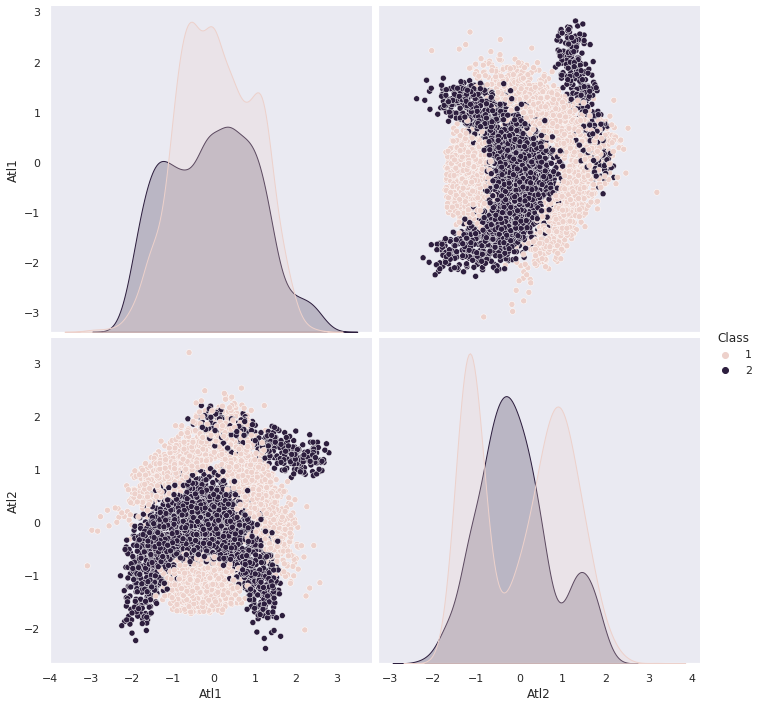

In [ ]:
sns.set_theme(style="dark")
sns.pairplot(data_nuevo, hue = 'Class', height = 5.0, aspect=1)
plt.show()

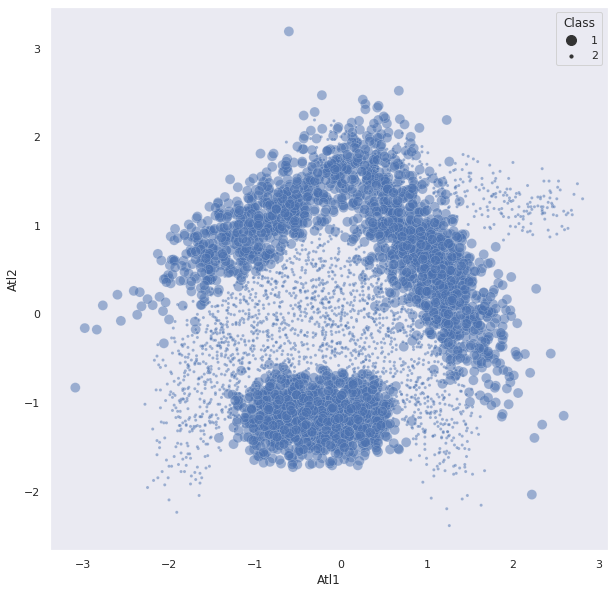

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.scatterplot(data = data_nuevo, x = "Atl1", y = "Atl2", size = "Class", alpha = 0.5, sizes = (100, 10))
plt.show()

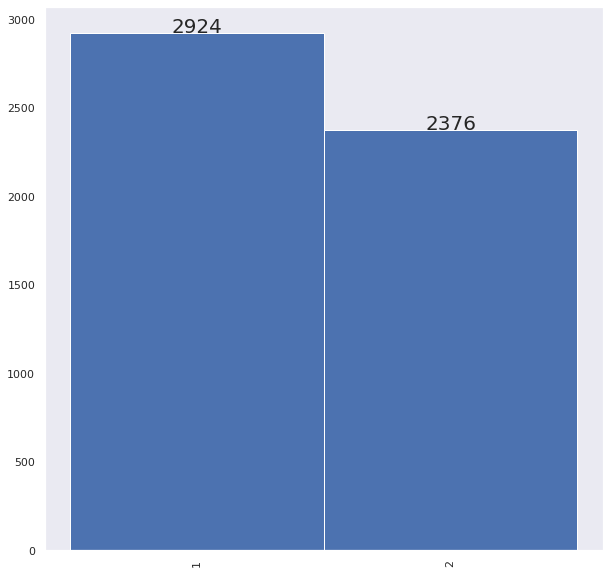

In [ ]:
Numero_Clases = data_nuevo['Class'].value_counts()
Clases = [1, 2]
Nums_Clases = [Numero_Clases[1], Numero_Clases[2]]
ancho_barra = 1.0
plt.bar(Clases, Nums_Clases, width = ancho_barra)
plt.xticks([k + ancho_barra for k in range(len(Clases))], 
           ['1', '2'], rotation = 90)
etiquetas = [Nums_Clases[0], Nums_Clases[1]]

for n in range(len(Clases)):
    plt.text(x = Clases[n]-0.1 , y = Nums_Clases[n]+0.1, s = etiquetas[n], size = 20)

plt.show()

## Herramienta útil para visualización radar

In [ ]:
data_features = (data_nuevo[['Atl1', 'Atl2']] - data_nuevo[['Atl1', 'Atl2']].min())/(data_nuevo[['Atl1', 'Atl2']].max() - data_nuevo[['Atl1', 'Atl2']].min())
# Normalización: x_norm = x - xmin / (xmax - xmin)
Media_Datos = data_features.mean()
Std_Datos = data_features.std()
Var_Datos = data_features.var()
Kurt_Datos = data_features.kurtosis()
Metricas = pd.DataFrame(np.array([Media_Datos,Std_Datos,Var_Datos,Kurt_Datos]), columns = ['Atl1', 'Atl2'], 
                        index = ['Media', 'Std', 'Var', 'Curtosis'])
display(Metricas)

,Atl1,Atl2
Media,0.523731,0.428319
Std,0.169471,0.179218
Var,0.028720,0.032119
Curtosis,-0.630722,-1.057857


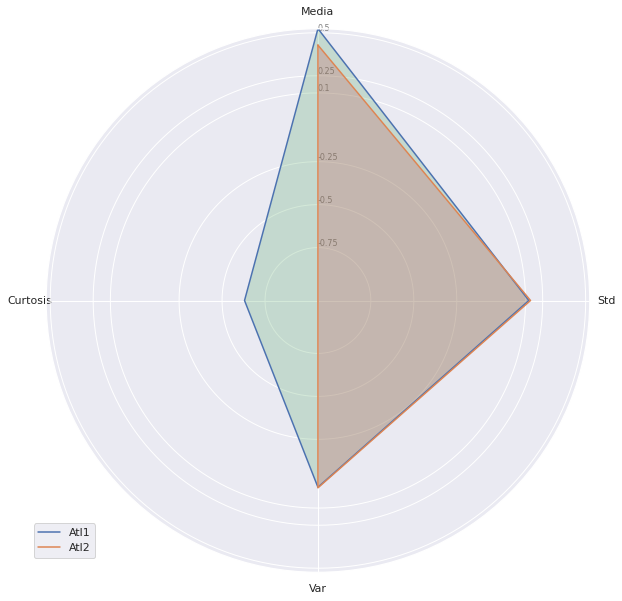

In [ ]:
Nombres_Filas = ['Media', 'Std', 'Var', 'Curtosis']
Longitud_Filas = len(Nombres_Filas)
angulos = [n/float(Longitud_Filas)*2*pi for n in range(Longitud_Filas)]
angulos += angulos[:1]
ax = plt.subplot(111, polar=True) # Usaremos coordenadas polares
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angulos[:-1], Nombres_Filas)
ax.set_rlabel_position(0)
plt.yticks([-1.1, -0.75, -0.5, -0.25, 0.15,0.25,0.5], 
           ["-1.1", "-0.75", "-0.5", "-0.25", "0.1", "0.25", "0.5"], color = "grey", size = 8)
plt.ylim(Metricas.min().min(), Metricas.max().max())

# Con la característica Atl1
valores = Metricas['Atl1'].values.flatten().tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth = 1.5, linestyle='solid', label="Atl1")
ax.fill(angulos, valores, 'g', alpha = 0.25)
 
# Con la característica Atl2
valores = Metricas['Atl2'].values.flatten().tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth = 1.5, linestyle='solid', label="Atl2")
ax.fill(angulos, valores, 'r', alpha = 0.25)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

## ggplot para análisis de datos

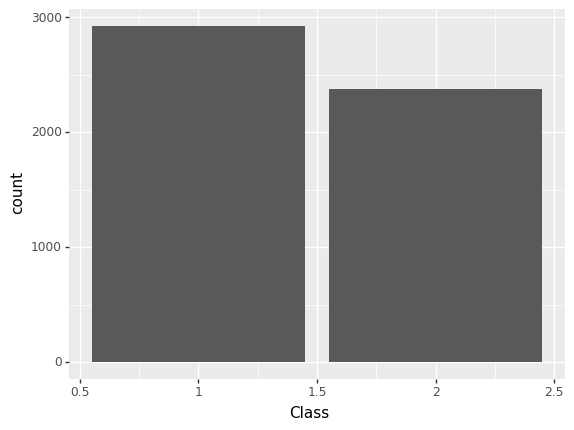

<ggplot: (8766778808537)>

In [ ]:
ggplot(data_nuevo) + aes(x = "Class") + geom_bar()

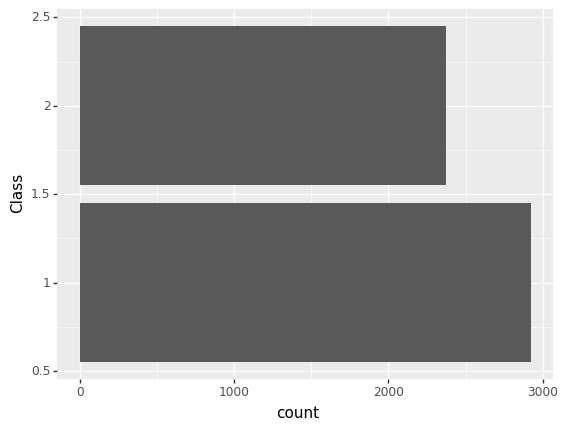

<ggplot: (8766778808349)>

In [ ]:
ggplot(data_nuevo) + aes(x = "Class") + geom_bar() + coord_flip()

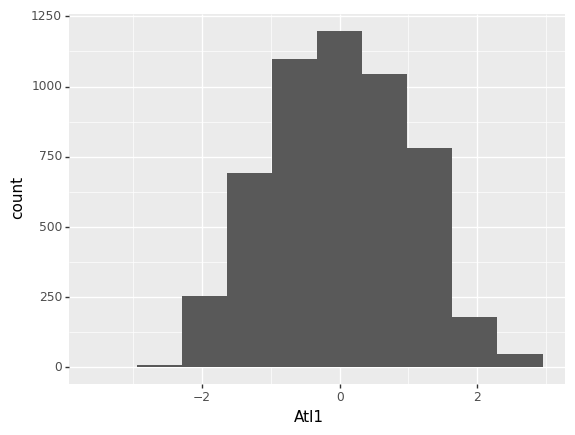

<ggplot: (8766778756177)>

In [ ]:
ggplot(data_nuevo[['Atl1', 'Atl2']]) + aes( x = "Atl1") + stat_bin(bins=10) + geom_bar()

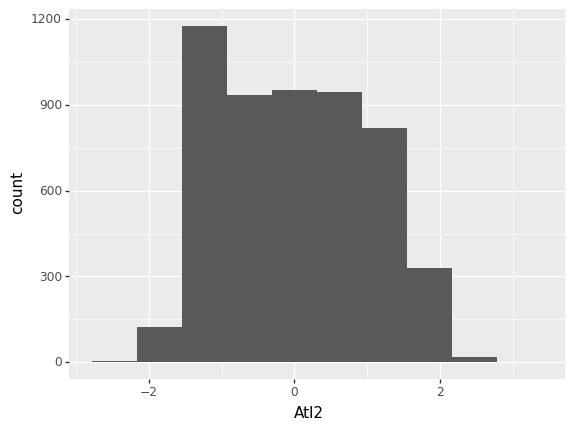

<ggplot: (8766778808489)>

In [ ]:
ggplot(data_nuevo[['Atl1', 'Atl2']]) + aes( x = "Atl2") + stat_bin(bins=10) + geom_bar()

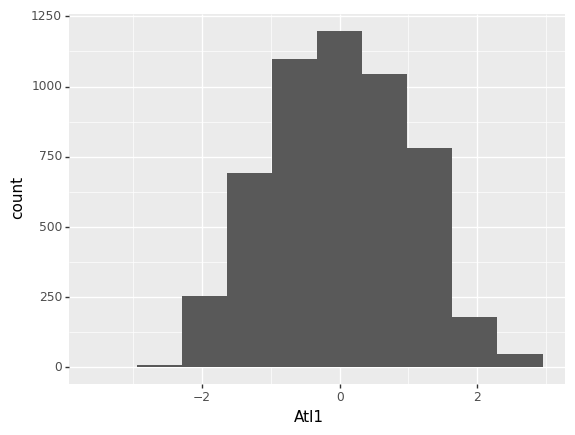

<ggplot: (8766785700317)>

In [ ]:
ggplot(data_nuevo[['Atl1', 'Atl2']]) + aes(x = "Atl1") + geom_histogram(bins=10) # otra alternativa

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


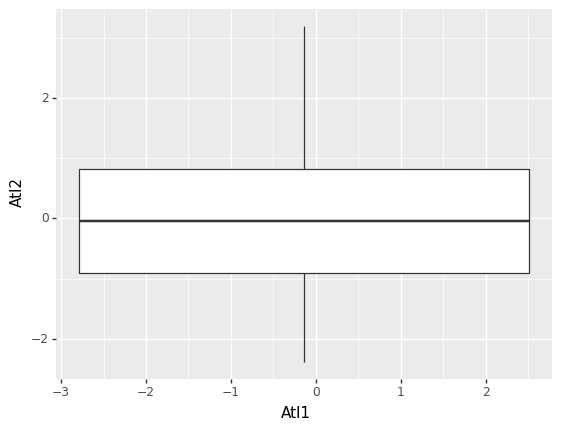

<ggplot: (8766778706617)>

In [ ]:
ggplot(data_nuevo) + aes(x="Atl1", y="Atl2") + geom_boxplot()